
# Dense vector for word representations


##  Coding words as dense vectors

- Problems with one hot encoding of words

    - What happens when two words that are very similar in spelling have a very different meaning?
    
    - The word_to_ind representation does not help providing similarities between words in the feature space (all words are at the same distance of each other).
    
    - Coding words as dense vectors can provide extra information to learning algorithms.



##  Word2Vec  Vectors

This notebook will show you

- What is word2vec
- How can we use word2vec implemented in gensim


In [11]:
import logging

## Coding words as dense vectors

First we will load a corpus of books

In [12]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [13]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidbuchaca1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidbuchaca1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
book_filenames = sorted(glob.glob("../data/books/*"))
book_filenames

['../data/books/got1.txt',
 '../data/books/got2.txt',
 '../data/books/got3.txt',
 '../data/books/got4.txt',
 '../data/books/got5.txt']

In [16]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '../data/books/got1.txt'...
Corpus is now 1770659 characters long

Reading '../data/books/got2.txt'...
Corpus is now 4071041 characters long

Reading '../data/books/got3.txt'...
Corpus is now 6391405 characters long

Reading '../data/books/got4.txt'...
Corpus is now 8107945 characters long

Reading '../data/books/got5.txt'...
Corpus is now 9719485 characters long




#### Split corpus into sentences

In [17]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [18]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [19]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [20]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [21]:
len(sentences)

128868

In [22]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [23]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,818,103 tokens


## Word2vec

Now that we have a corpus of books we will train a word2vec

#### Train word2vec

In [24]:
num_features = 300

# Minimum word count threshold.
min_word_count = 0

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 5

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

seed = 1

#optional Training algorithm: 1 for skip-gram; otherwise CBOW
sg = 1


In [25]:
word2vec = w2v.Word2Vec(
    sg=sg,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling)

In [26]:
word2vec.build_vocab(sentences, keep_raw_vocab=True)

In [27]:
word2vec.corpus_count

128868

In [28]:
#print("Word2Vec vocabulary length:", len(word2vec.vocab))

In [29]:
word2vec.vocabulary

In [30]:
len(word2vec.vocabulary.raw_vocab)

29026

#### Train word2vec

```

ValueError: You must specify either total_examples or total_words, for proper job parameters updationand progress calculations. The usual value is total_examples=model.corpus_count.

```

In [31]:
total_examples = len(sentences)
total_examples

128868

In [32]:
%%time
word2vec.train(sentences,
               epochs = 20,
               total_examples=total_examples)

CPU times: user 2min 18s, sys: 901 ms, total: 2min 19s
Wall time: 20.6 s


(14215832, 18181030)

#### inspect words

In [33]:
words = list(word2vec.wv.vocab)

In [34]:
len(words)

29026

In [35]:
vectors = list(word2vec.wv.vectors)

In [36]:
len(vectors)

29026

#### get vector of a word

We can get a vector for a particular word using `.wv.get_vector`

This vectors are the parameters of the first layer of a neural net that has been trained using the word2vec methodology. This technique uses a feedforward neural network with a single hidden layer of linear units.

The vectors are simply the rows (or columns) of the first layer matrix of weights. 

In [39]:
word2vec.wv.get_vector("magic").shape

(300,)

In [40]:
word2vec.wv.get_vector("magic")

array([-4.01382506e-01,  5.50535619e-02, -1.14705615e-01, -1.56475931e-01,
       -1.70105882e-02,  2.08439007e-01, -2.02482313e-01,  6.39626086e-02,
       -3.30386043e-01,  2.85487026e-01, -3.38095486e-01, -1.32212982e-01,
       -3.06671321e-01,  3.78130302e-02,  2.89318562e-02,  2.00809836e-01,
        1.59049526e-01,  1.26114085e-01, -1.93786137e-02,  6.84592500e-02,
       -1.20917432e-01, -3.99755359e-01, -1.27183631e-01, -8.14879406e-03,
        6.88419715e-02,  4.47888076e-01,  2.31205091e-01,  6.30100518e-02,
        1.09852239e-01, -1.83777921e-02, -1.88581459e-02,  2.65349090e-01,
        2.24876970e-01,  1.82854161e-01,  1.00224577e-01,  2.30237424e-01,
       -3.07640940e-01, -1.55192791e-02, -5.37623227e-01, -1.99972987e-01,
        1.30216703e-01,  1.24587029e-01,  2.68099070e-01, -2.26542220e-01,
        1.56658247e-01, -6.11160845e-02, -2.16967743e-02, -1.02054738e-01,
        1.93471834e-01,  1.33498967e-01, -1.33226989e-02, -4.88107502e-01,
        1.13935083e-01,  

#### Find most similar words to a query word

Now we can find similar words to a given word in our vocabulary

In [41]:
# Do you know which book is this? There is a Tyrion character that is
# supposed to be similar to a dwarf///
w = "Tyrion"
word2vec.wv.most_similar(positive=w, topn=5)

[('dwarf', 0.5258480310440063),
 ('Jaime', 0.47681957483291626),
 ('Shae', 0.47538983821868896),
 ('crookedly', 0.46959200501441956),
 ('sourly', 0.46955788135528564)]

In [42]:
w = "sword"
word2vec.wv.most_similar(positive=w, topn=5)

[('longsword', 0.6551774740219116),
 ('blade', 0.6407159566879272),
 ('hilt', 0.6169991493225098),
 ('lance', 0.5735697150230408),
 ('spear', 0.5426067113876343)]

In [43]:
w = "arrow"
word2vec.wv.most_similar(positive=w, topn=5)

[('nocked', 0.6768800616264343),
 ('slits', 0.6479719877243042),
 ('quiver', 0.6386429071426392),
 ('notched', 0.6360662579536438),
 ('bowstring', 0.6282175779342651)]

#### cosine similarity  between words

In [44]:
word2vec.wv.similarity("magic","spell")

0.5363382808799075

In [45]:
word2vec.wv.similarity("Tyrion","sex")

0.25322268605153136

In [46]:
word2vec.wv.similarity("Cersei","sex")

0.3811327125616516

In [47]:
word2vec.wv.similarity("magic","wizard")

0.4646758465125122

In [48]:
word2vec.wv.similarity("magic","stone")

0.20774104197330828

In [49]:
word2vec.wv.similarity("magic","Tyrion")

0.13599291999546886

In [50]:
word2vec.wv.similarity("sword","longsword")

0.6551775073511553

In [51]:
word2vec.wv.similarity("sword","axe")

0.454823400284247

In [52]:
word2vec.wv.similarity("sword","arrow")

0.3336933359533217

In [53]:
word2vec.wv.similarity("shoot","arrow")

0.4203358673366559

In [54]:
word2vec.wv.similarity("shoot","sword")

0.3371215570199992

#### Investigate this manually

We can implement our own cosine similarity which should provide the same numbers as `wv.similarity`

In [65]:
magic = word2vec.wv.get_vector("magic")
stone = word2vec.wv.get_vector("stone")

def cosine_similarity(w1,w2):
    return np.dot(w1,w2)/(np.linalg.norm(w1)*np.linalg.norm(w2))

In [66]:
cosine_similarity(magic,stone)

0.20774105


#### save to disc

In [57]:
# foldername = "/home/trained_word2vec"
# modelname  = "word2vec.w2v"
# if not os.path.exists(foldername):
#     os.makedirs(foldername)
#     word2vec.save(os.path.join(foldername, modelname))
# else:
#     print("folder {} already exists".format(foldername))

In [58]:
#word2vec = w2v.Word2Vec.load(os.path.join(foldername, modelname))

#### Compress word vectors in 2d space

We can use tsne to project the data into a lower dimensional space

In [59]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0, n_iter=500)

In [60]:
word2vec.trainables.syn1neg.shape

(29026, 300)

In [61]:
all_word_vectors_matrix = word2vec.trainables.syn1neg

#### Train t-SNE, this could take a minute or two...


In [62]:
tsne.n_iter

500

In [84]:
%%time 
vectors_2d = tsne.fit_transform(vectors)

CPU times: user 13min 19s, sys: 9.32 s, total: 13min 28s
Wall time: 8min 51s


#### Plot 

In [85]:
#vectors_2d = all_word_vectors_matrix_2d

In [86]:
vectors_2d.shape, len(vectors)

((29026, 2), 29026)

In [87]:
points = pd.DataFrame(
    [(w, c[0], c[1]) for w,c in zip(words, vectors_2d)],
    columns=["word", "x", "y"]
)

In [88]:
sns.set_context("poster")

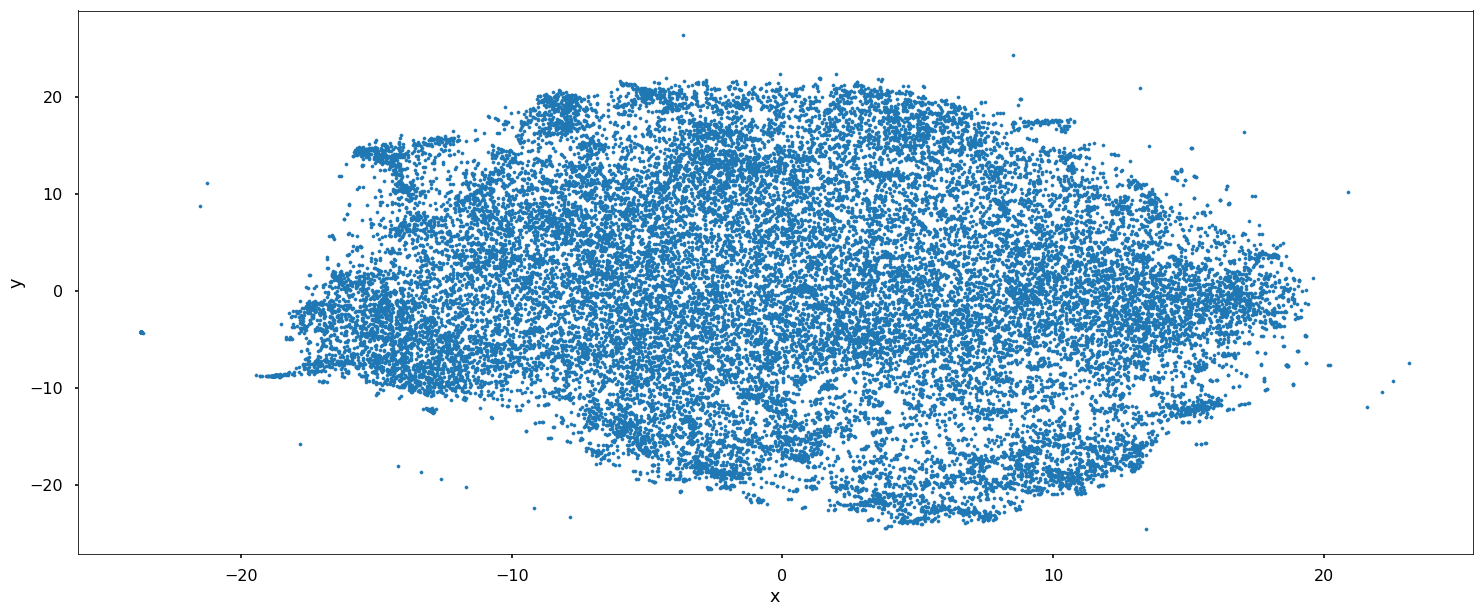

In [89]:
points.plot.scatter("x", "y", s=10, figsize=(25, 10))

In [90]:
points.dtypes

word     object
x       float64
y       float64
dtype: object

#### Zooom in a region

In [91]:
def plot_region(x_bounds, y_bounds, delta=0.001):
    
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + delta, point.y + delta, point.word, fontsize=11)

#### People related to Kingsguard ended up together


In [92]:
x_bounds=(-2.0, -1.0) 
y_bounds=(-0.5, 0.5)

slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])]

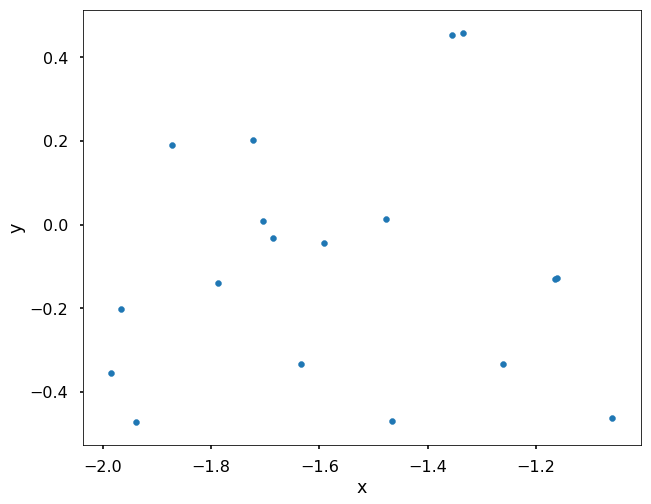

In [93]:
slice.plot.scatter("x", "y", s=35, figsize=(10, 8))

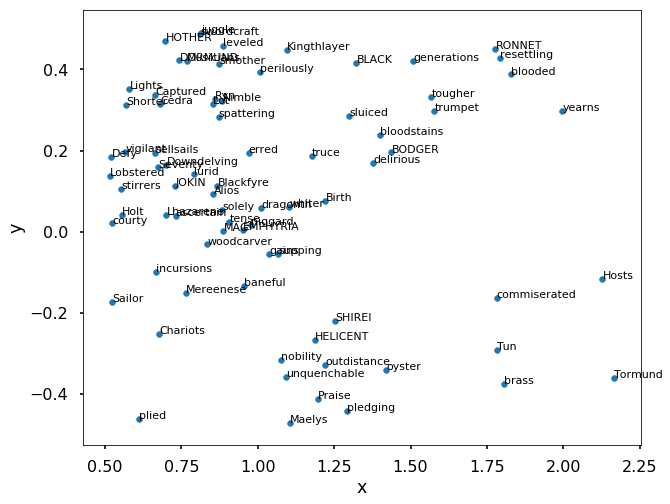

In [103]:
plot_region(x_bounds=(0.5, 2.2), y_bounds=(-0.5, 0.5))

#### Linear relationships between word pairs


In [104]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = word2vec.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [105]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons");

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as drank is related to wine
Arya is related to Nymeria, as dwarfs is related to dragons
